<a href="https://colab.research.google.com/github/lgcaobianco/udacityMLE/blob/master/boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports and Configs

In [0]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '/home/lgcaobianco/repositorios/courses/udacity-MLE/boston_housing')
import visuals as vs

from sklearn.model_selection import ShuffleSplit
%matplotlib inline

#Importing Data

In [113]:
full_data = pd.read_csv("/home/lgcaobianco/repositorios/courses/udacity-MLE/boston_housing/data.csv")
print(full_data.head())
print("data has " + str(len(full_data)) + " rows")
data = np.array(full_data)

      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0
data has 489 rows


##Meaning of data


1.   **RM**: average number of rooms per dwelling
1.   **LSTAT**: percentage of population considered lower status
1. **PTRATIO**: pupil-teacher ratio by town
1. **MEDV**: median value of owner-occupied homes

The target variable is the **MEDV** and the features consist of all other columns. 



##Splitting features and target variable

In [0]:
X = data[:, 0:3]
y = data[:, 3]

#Investigation of prices

In [115]:
min_medv = y.min()
max_medv = y.max()
avg_medv = y.mean()
std_medv = y.std()
print("Minimum value of MEDV: "+ str(min_medv) + "; Maximum value of MEDV: "+str(max_medv))
print("Average value of MEDV: "+ str(avg_medv) + "; Standard Dev. of MEDV: "+str(std_medv))

Minimum value of MEDV: 105000.0; Maximum value of MEDV: 1024800.0
Average value of MEDV: 454342.9447852761; Standard Dev. of MEDV: 165171.13154429474


###**Question 1 - Extracted from project**
Using your intuition, for each of the three features: **RM** (*number of rooms*),  **LSTAT** (*percent of lower class workers in neighborhood*) and **PTRATIO** (*ration of students to teachers in neighborhood*), do you think that an increase in the value of that feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'? Justify your answer for each.

###Answer
In order to answer such questions, data will be evaluated through plots, in an attempt to confirm personal intuitions

####RM
It is expected that as RM value grows, MEDV should also increase. This behaviour can be easily visualized on the following image

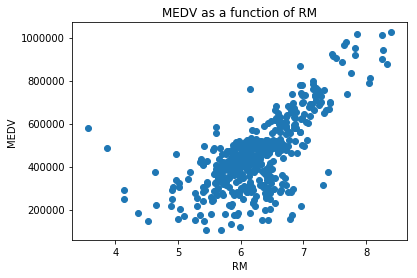

In [116]:
import matplotlib.pyplot as plt
plt.scatter(full_data['RM'], full_data['MEDV'])
plt.title("MEDV as a function of RM")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

###LSTAT
It is expected that as the value of LSTAT increases, property value should decrease. Such behaviour is clear on the following image

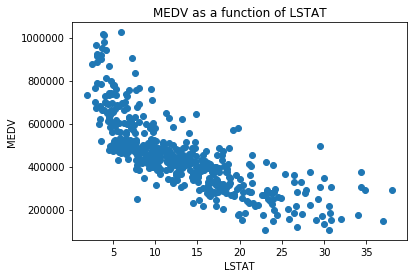

In [117]:
plt.scatter(full_data['LSTAT'], full_data['MEDV'])
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.title("MEDV as a function of LSTAT")
plt.show()

###PTRATIO
A higher ratio of student to teacher might signal full classrooms, a behaviour more commonly found in low class neighborhoods. Therefore, it is expected that, within a certain variation, as the ratio increases value of property should decrease.

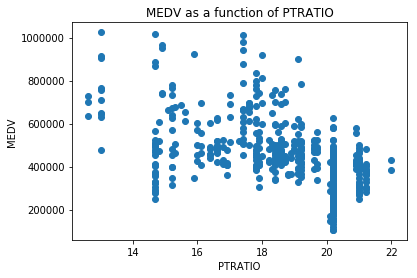

In [118]:
plt.scatter(full_data['PTRATIO'], full_data['MEDV'])
plt.xlabel("PTRATIO")
plt.ylabel("MEDV")
plt.title("MEDV as a function of PTRATIO")
plt.show()

As it was expected, within a certain variation, the value of MDEV still decreases as PTRATIO increases.

#Developing model
The metric ```r2_score```  from ```sklearn.metrics``` will be used to decide what is the best model.

###splitting data

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True)
#validation set is created
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle = True)
print("train has "+ str(len(X_train)) + " values; validation has: "+str(len(X_val))
      + " values; test has: " + str(len(X_test)) +" values;")

train has 274 values; validation has: 92 values; test has: 123 values;


#defining method ```performance_metric```

In [0]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
  """ Returns the performance metric between TRUE value and PREDICTED value """
  return r2_score(y_true, y_predict)

###Question 2 Assuming a dataset with given values, run the given code and evaluate if such model could be used in the prediction of values.

```
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))
```


In [121]:
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


####Answer: Yes, such model could be used to predict the values of the given dataset. ```r2_score``` values close to 1 indicate that there is a correlation between the ```x``` and ```y``` values.

###Question 3 - Training and Testing
**What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?**
Answer: The main benefit is avoiding overfitting, because if the whole data is used to train the model, then when the model is tested it will be receiving a tuple that has already learned upon it, and therefore you do not have any guarantees that the model hasn't overfitted on the whole set. However, if the data used in test is completely new to the model, in other words, if the test data hasn't been used in training, it is impossible for the model to have overfitted on it, mainly because the model itself has never seen these data before

#Analyzing model performance

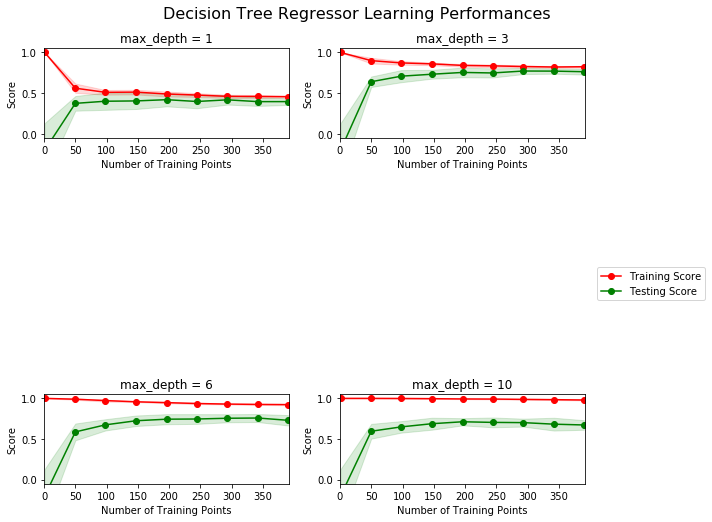

In [122]:
vs.ModelLearning(X, y)

###Answering questions
- I would choose ```max_depth = 3```, because it has the smaller difference between training and testing *with* the highest score
- As the curves represent the effectiveness of the generalization built in the model, increasing training points would not impact strongly on the learning curves of training and testing, as long as the data still obey the same patterns in the original data
- No. As long as the data has the same pattern of the original data, increasing the size of the training set would not have impact on the model, as it finds a *pattern* among the data given, and if the pattern is already well represented, there is no benefit from increasing training set size.

###Question 5 - Bias vs Tradeoff
Analyze the following image, produced by Udacity's method, and answer the following questions.
- When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?
- How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

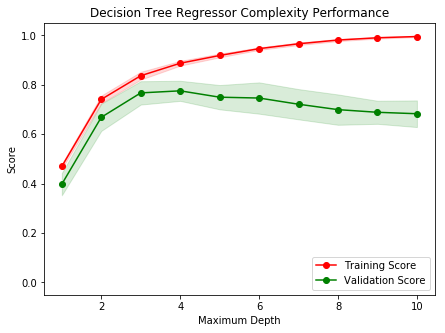

In [123]:
vs.ModelComplexity(X_train, y_train)

###Answer
Looking at the model with ```depth  = 10``` it is possible to see the extremely high score on training set but low score with high uncertainty on validation set. This means that the model is *by-hearting* the data, and when new data are put through it the model is not able to generalize well. However, when we look at ```depth = 1```, the model is clearly not complex enough to find the pattern contained in the data.

###Question 6 - Best guess optimal model
I would choose the model with ```depth = 3```. It can be seen that the difference between the training and validation set is small, and it also has a smaller uncertainty than ```depth = 4```.

###Question 7 - Grid Search
- What is Grid Search and how can it be applied to optimize a learning algorithm?

Let us imagine a MLP using only one hidden layer and only 5 neurons on its hidden layer. Let us also imagine that this model is underfitting, and so we have to make a decision in order to improve the given model.

There are many parameters which can be change in an attempt to improve said model. For instance, amount of neurons on the hidden layer might be increased, or the activation function might be changed. Besides that, it is also possible to increase the amount of hidden layers. However, combinations of such factors might also improve the model, e.g. high amount of neurons and *tanh* activation function might be better than high amount of neurons and *logistic* function.

In an attempt to cover all combinations of possible parameters changed, it is possible to create a table, or a *grid*, with the possible values of each parameter, and test them all. This is called the **grid search techinique**, in which all possible parameters of a given model are assesed. This techinque might improve the model because by applying this technique it is possible to find combinations of parameters that optimize the problem being studied.

###Question 8
- What is the k-fold cross validation training techinique and how it benefits the grid search when optimizing a model?

When performing grid search, the same data is always tested throughout all possible combinations of parameters evaluated by the grid search. 

The *k-fold* technique consists in splitting the training, validation and testing set in subsets, and performing a grid search. After the grid search is performed, a new subset of the data is picked and the grid search is performed again.

The advantage of using this technique is testing different combinations of data splitting.

#Final implementation
The final implementation must be done using ```DecisionTreeRegressor```, ```make_scorer``` and ```GridSearchCV```.


In [146]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer



def fit_model(X,y):
  """ returns the best decision tree regressor"""
  cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
  parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
  regressor = DecisionTreeRegressor()
  scorer = make_scorer(performance_metric)
  grid_obj = GridSearchCV(regressor, parameters, scorer)
  return grid_obj.fit(X, y).best_estimator_

reg = fit_model(X_train, y_train)
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


##Predictions of model

In [147]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $409,033.33
Predicted selling price for Client 2's home: $288,400.00
Predicted selling price for Client 3's home: $925,500.00


##Sensitivity of model

In [149]:
vs.PredictTrials(X, y, fit_model, client_data)

Trial 1: $411,000.00
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $428,316.00
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $28,652.84


###Question 11
It is possible to see that there is little variation between the prices among the 10 trials performed. The range, 28k dollars, is a relatively small value if compared to the maximum and minimum predictions offered by the model. This means that predictions are solid, and it could be used in a real-world setting.

- Data from 1978 is extremely old, given the huge changes that have happened in the real world, new criteria might *more* useful to predict housing prices, such as criminality.
- Data such as presence of pool, *amount of inhabitants per sqm* might be more useful and should factor in, given that tendencies show that lower class population has a higher fertility and smaller properties
- The model is robust enough to make predictions in the setting that it was created
- No, it wouldn't. Rural cities might have other *criteria*  more relevant to its setting.
- Yes, it is. The qualities of the neighborhood have an outstanding impact on the value of a house. Neighborhoods with high criminality rates, fewer schools, dense population hardly ever will have a high terrain value. In conclusion, housing prices aren't measured only on the house attributes such as square meter built, presence of pools or other things. Housing price also takes in consideration the neighborhood where it is located, and therefore it is fair judge the house value based on the neighborhood characteristics because it *does* follow a pattern: higher class neighborhoods have different characteristics than low class, and houses in higher class neighborhoods often have better features than the ones in lower class neighborhoods.